# Testing the `plot` module

**Authorship:**
Adam Klie, *07/12/2022*
***
**Description:**
Notebook for testing out the `plot` module.

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import torch
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt

Global seed set to 13
2022-10-07 08:56:06.442220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [8]:
sdata = eu.datasets.random1000() 
eu.pp.ohe_seqs_sdata(sdata)
eu.pp.train_test_split_sdata(sdata)

One-hot encoding sequences:   0%|          | 0/1000 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 1000 ohe_seqs added
SeqData object modified:
    seqs_annot:
        + train_val


# Raw data plotting functions (`_catplot.py`)

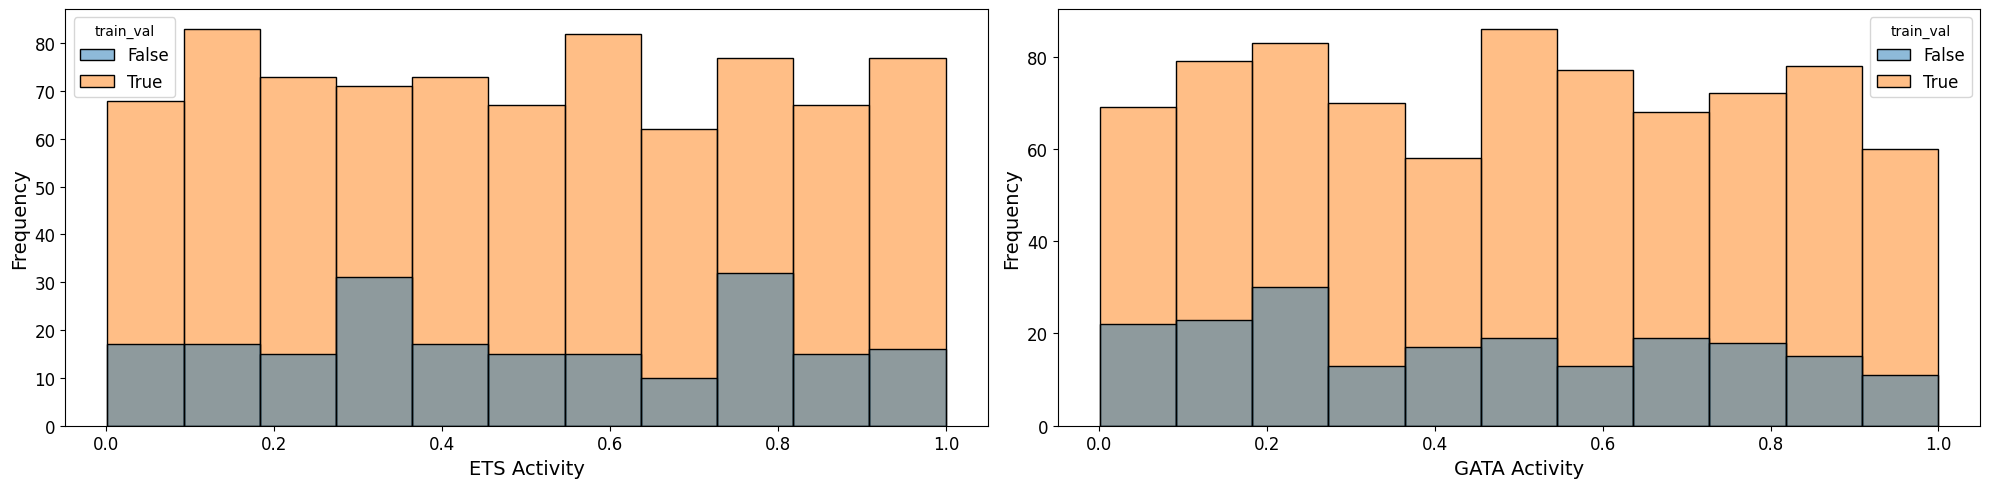

In [12]:
def test_histplot(sdata):
    ax = eu.pl.histplot(sdata, keys=["activity_0", "activity_1"], orient="h", hue="train_val", return_axes=True)
    ax[0].set_xlabel("ETS Activity")
    ax[1].set_xlabel("GATA Activity")
    plt.show()
test_histplot(sdata)

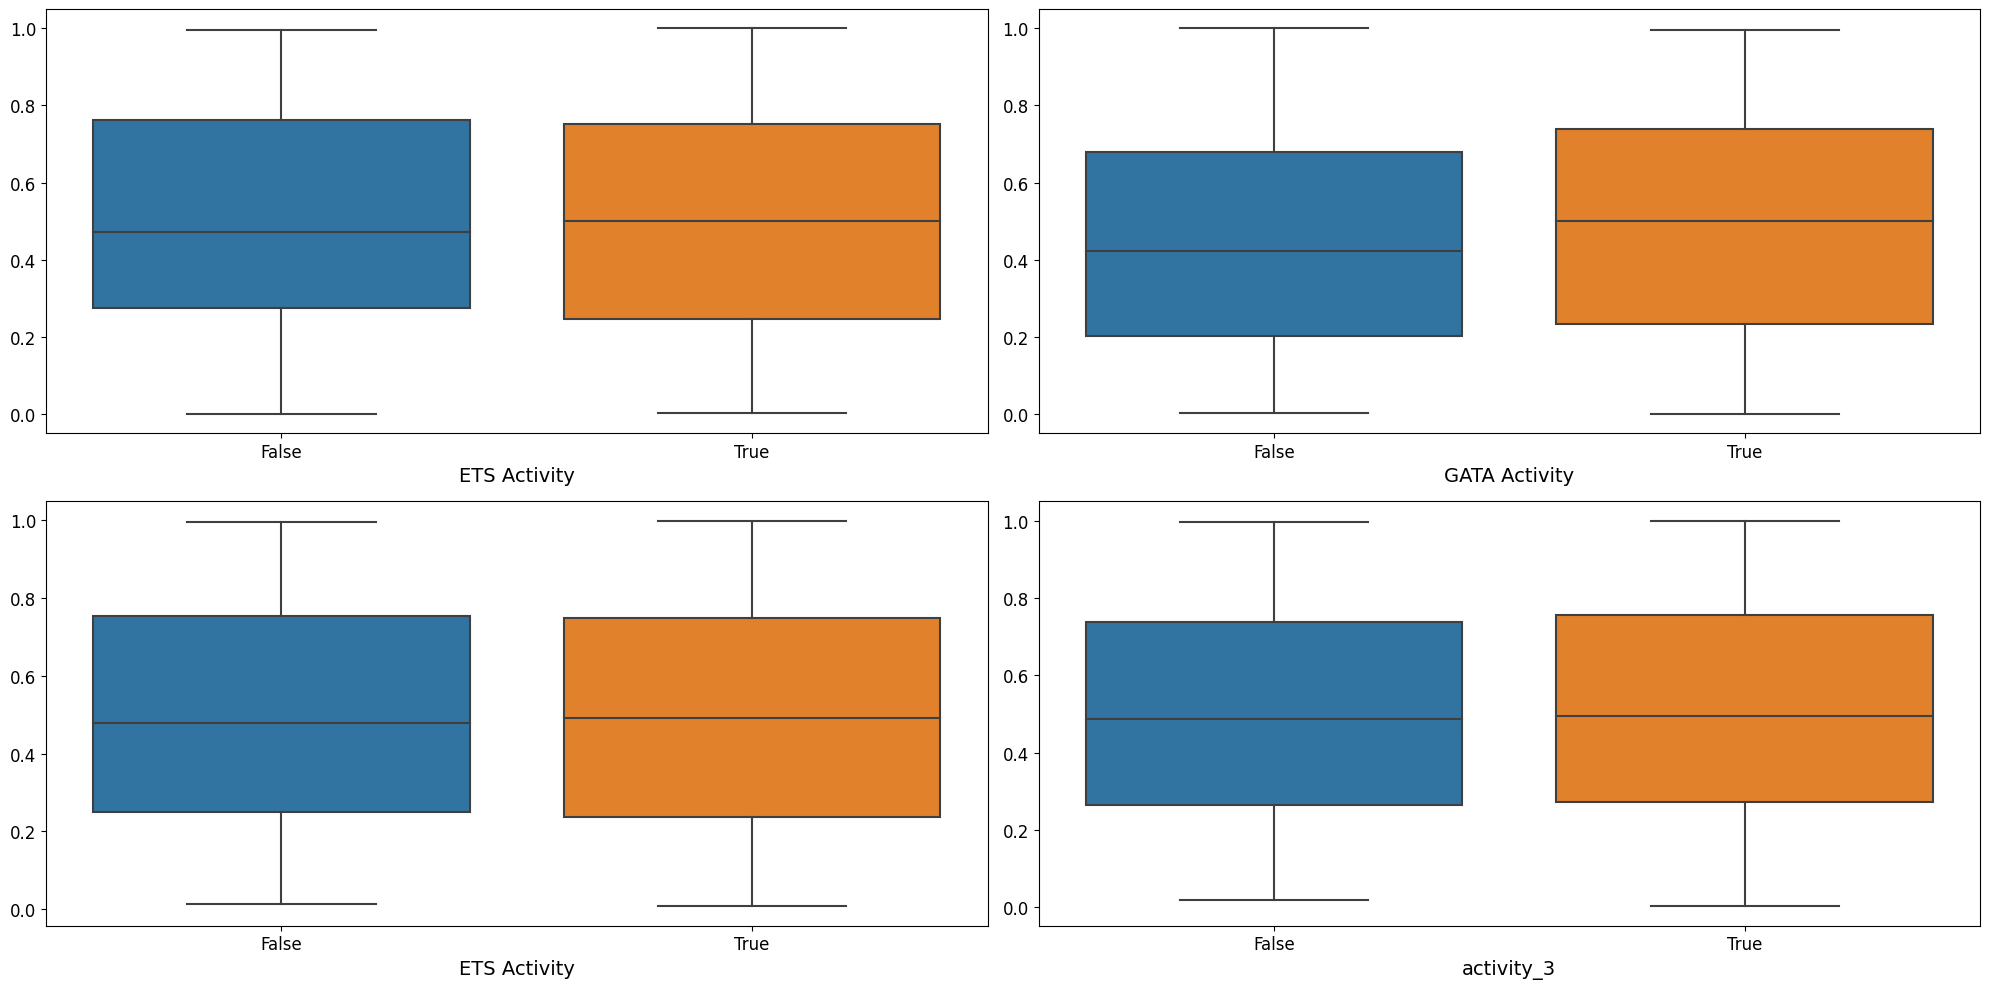

In [14]:
def test_boxplots():
    ax = eu.pl.boxplot(sdata, keys=['activity_0', 'activity_1', 'activity_2', 'activity_3'], groupby="train_val", return_axes=True)
    ax[0].set_xlabel("ETS Activity")
    ax[1].set_xlabel("GATA Activity")
    ax[2].set_xlabel("ETS Activity")
    plt.show()
test_boxplots()

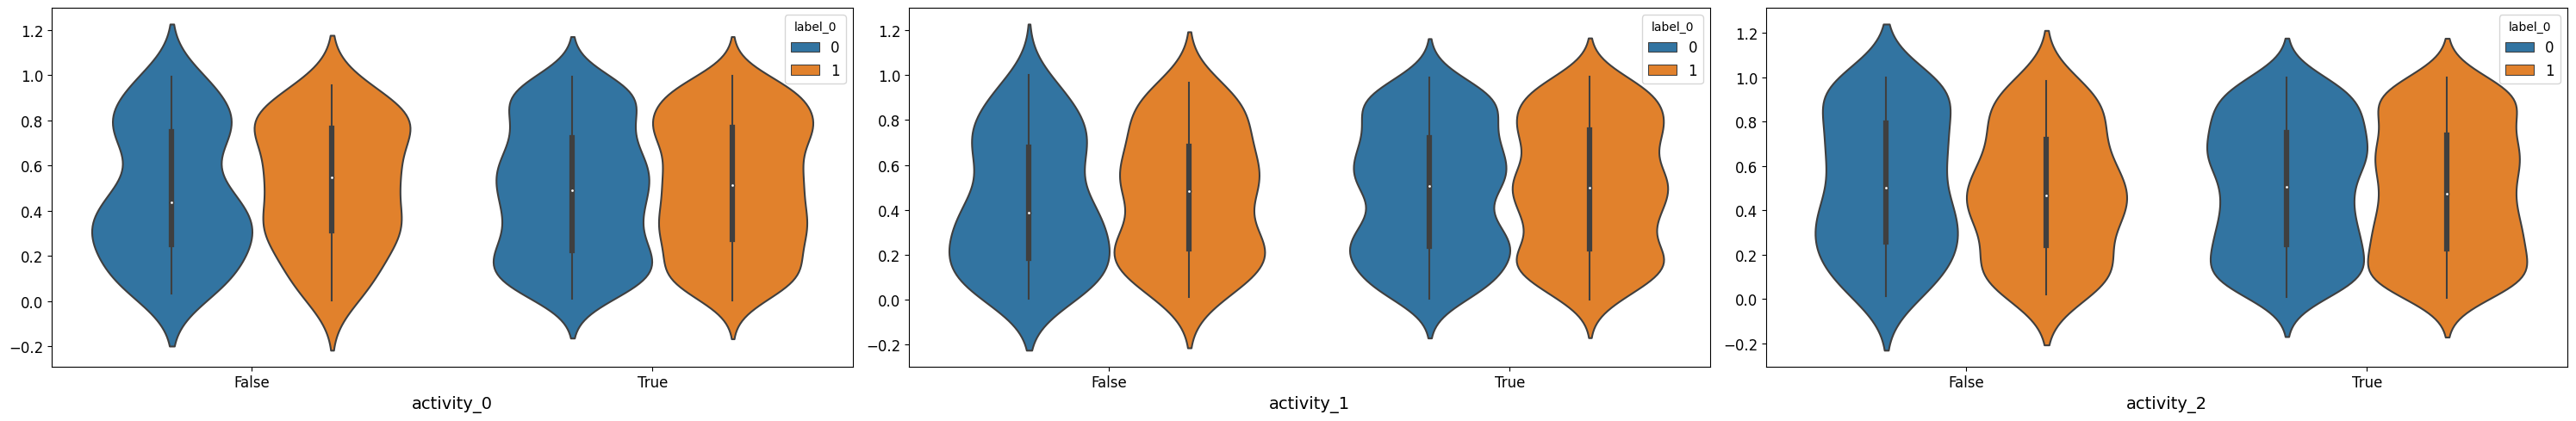

In [16]:
def test_violinplot():
    eu.pl.violinplot(sdata, keys=['activity_0', 'activity_1', 'activity_2'], groupby="train_val", hue="label_0")
    plt.show()
test_violinplot()

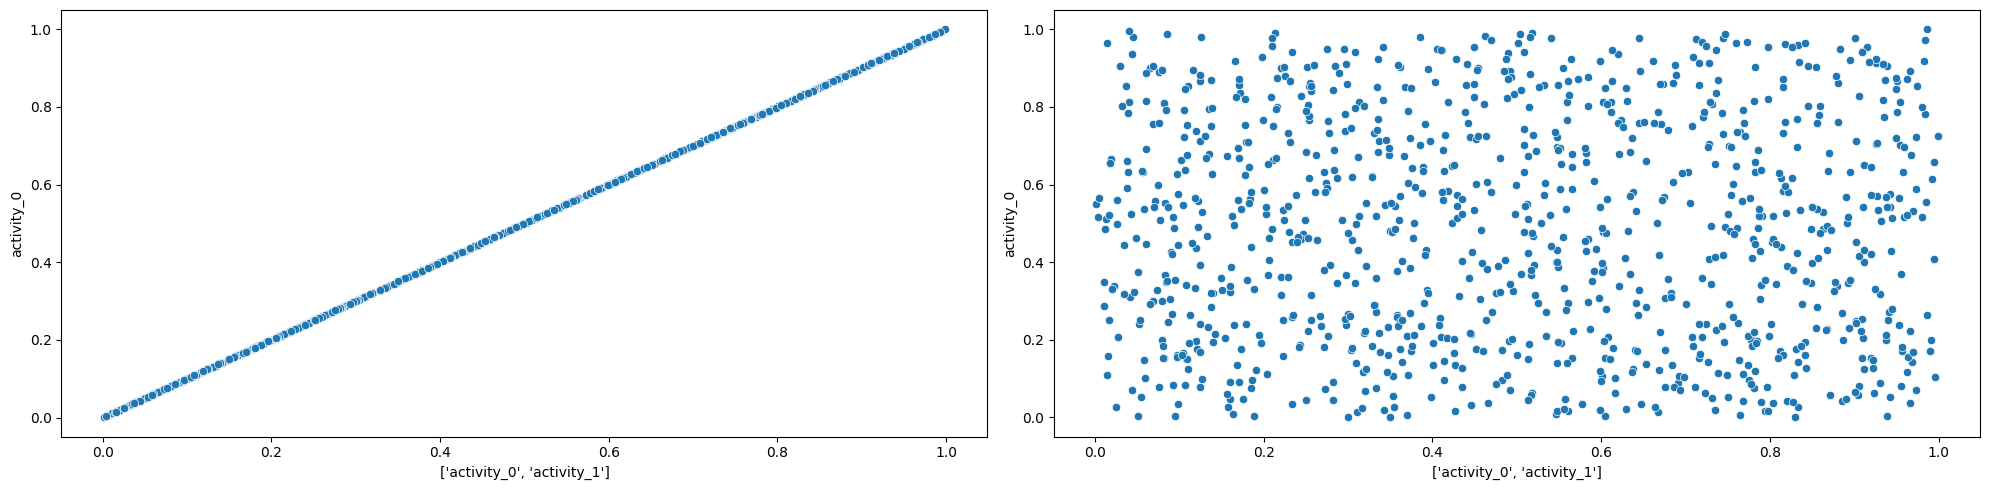

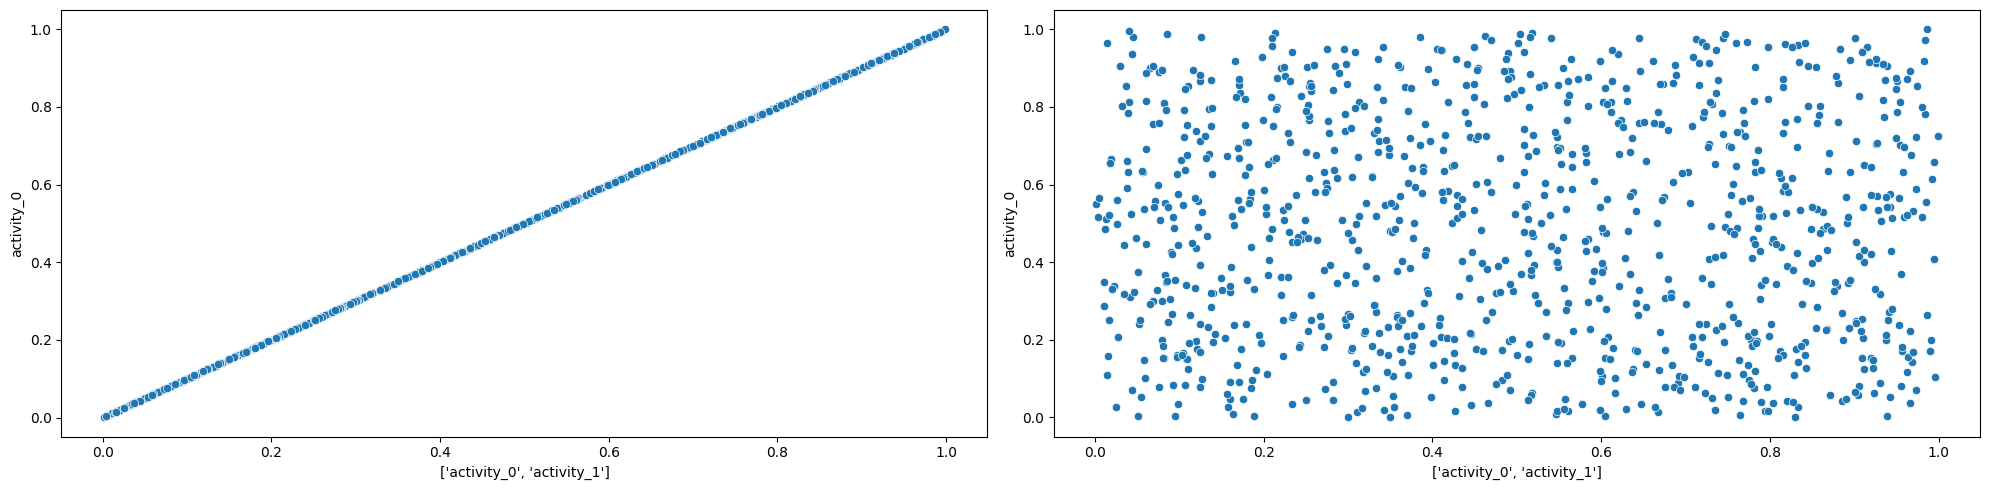

In [18]:
# Scatter plots
def test_scatterplot():
    eu.pl.scatterplot(sdata, x=["activity_0", "activity_1"], y="activity_0")
    plt.show()
test_scatterplot()

# Training evaluation plotting functions (`_training.py`)

In [23]:
eu.settings.logging_dir = "../../_logs/"

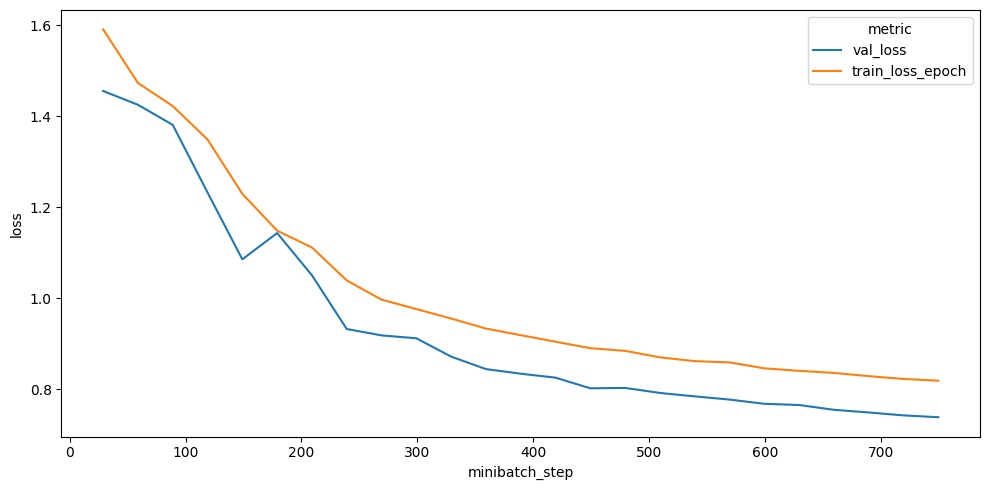

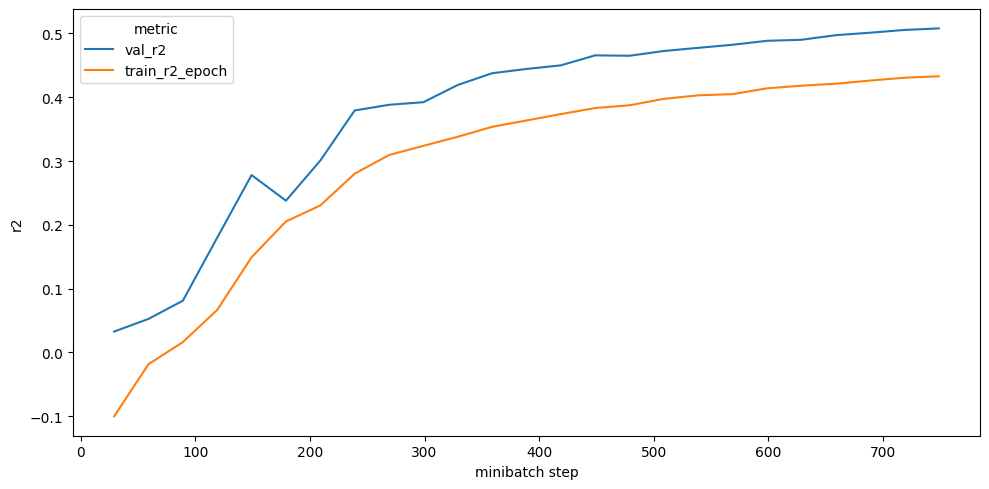

In [28]:
def test_loss_curve():
    eu.pl.loss_curve()
    plt.show()

def test_metric_curve():
    eu.pl.metric_curve(metric="r2")
    plt.show()

def training_summary():
    eu.pl.training_summary(metric="r2")
    plt.show()

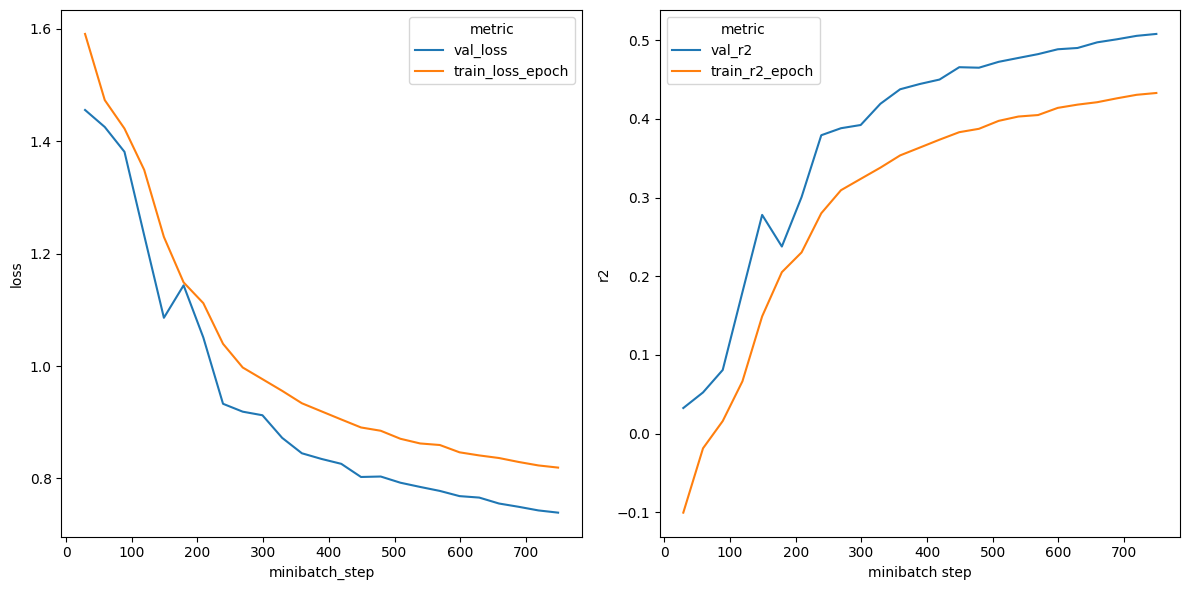

# Regression evaluation plotting functions (`_regression.py`)

In [40]:
def test_performance_scatterplot():
    eu.pl.performance_scatter(
        sdata, 
        target_keys="activity_1", 
        prediction_keys="activity_1"
    )
    plt.show()

# Classification evaluation plotting functions (`_classification.py`)

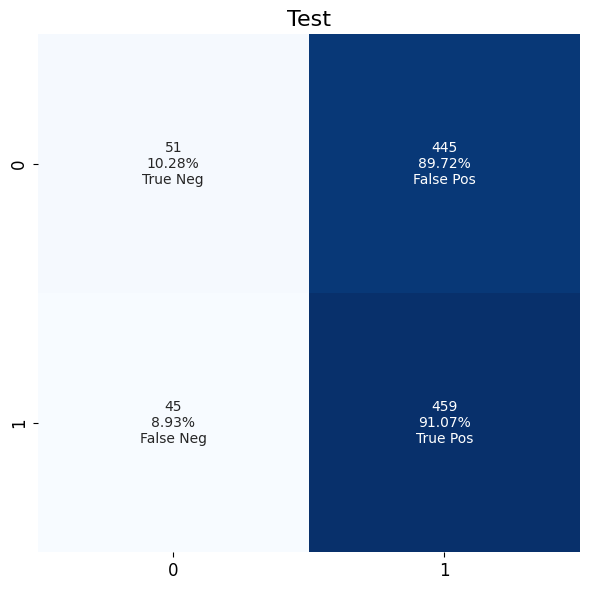

In [46]:
# Confusion matrix
def test_confusion_matrix():
    eu.pl.confusion_mtx(sdata, target_key="label_0", prediction_key="activity_0", threshold=0.1, title="Test")
    plt.show()
test_confusion_matrix()

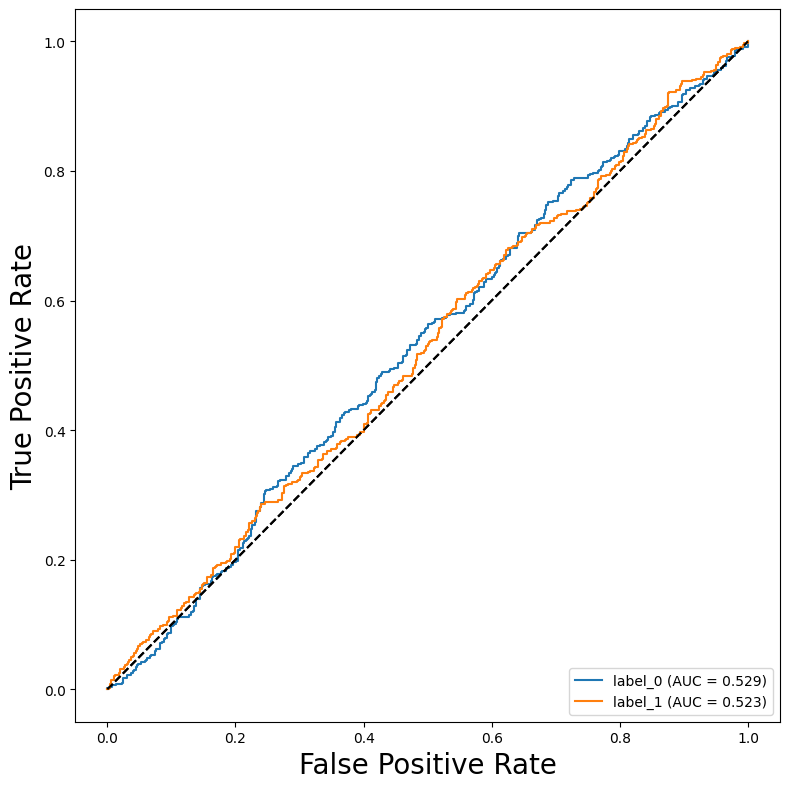

In [48]:
def test_auroc():
    eu.pl.auroc(sdata, target_keys=["label_0", "label_0"], prediction_keys=["activity_0", "activity_1"])
    plt.show()
test_auroc()

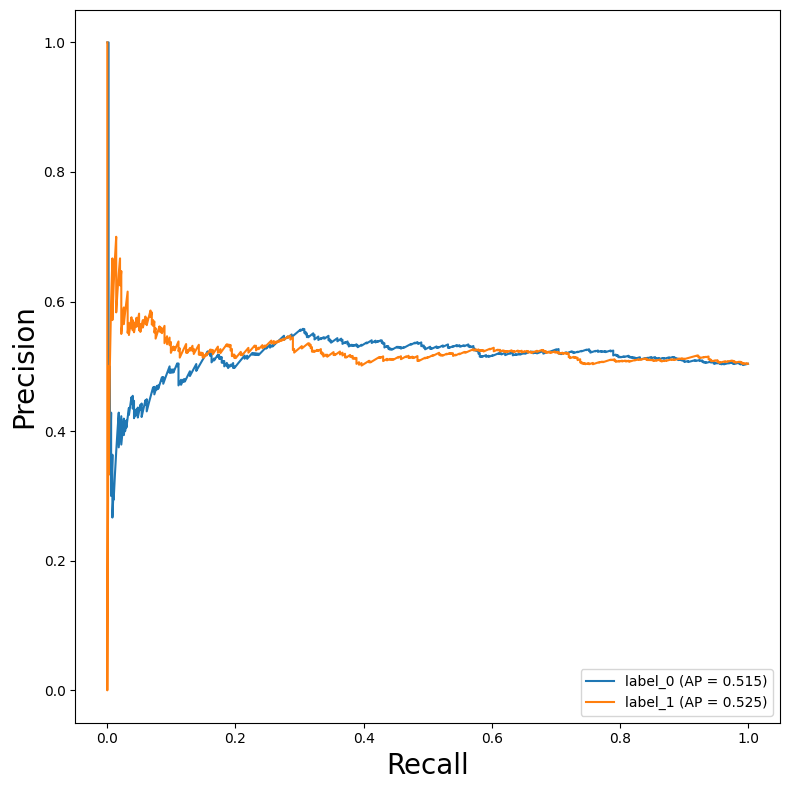

In [49]:
# Plot auprc curve
def test_auprc():
    eu.pl.auprc(sdata, target_keys=["label_0", "label_0"], prediction_keys=["activity_0", "activity_1"])
    plt.show()
test_auprc()

# Sequence plotting functions (`_seq.py`)

In [3]:
model = eu.models.DeepBind(input_len=100, output_dim=1)

In [10]:
eu.interpret.feature_attribution_sdata(model, sdata)

HERES SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 4, 100)
ohe_rev_seqs = None
seqs_annot: 'label_0', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7', 'label_8', 'label_9', 'activity_0', 'activity_1', 'activity_2', 'activity_3', 'activity_4', 'activity_5', 'activity_6', 'activity_7', 'activity_8', 'activity_9', 'train_val'
pos_annot: None
seqsm: None
uns: 'InputXGradient_imps'
No transforms given, assuming just need to tensorize.


Computing saliency on batches of size 128:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
eu.interpret.generate_pfms_sdata(model, sdata)

No transforms given, assuming just need to tensorize.


Getting maximial activating seqlets:   0%|          | 0/7 [00:00<?, ?it/s]

Getting filter activators for 16 filters:   0%|          | 0/16 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/16 [00:00<?, ?it/s]

In [17]:
eu.dataload.motif.jaspar_annots_sdata(
    sdata,
    motif_names=["GATA1"]
)

Saved PWM File as : motifs.meme


In [20]:
sdata.pos_annot

,Chromosome,Start,End,Strand,Score,Pvalue,Qvalue,Accession,Name
0,seq059,91,81,-,11.560284,0.000074,0.937016,MA0035,GATA1
1,seq067,81,91,+,11.617021,0.000072,0.937016,MA0035,GATA1
2,seq122,12,2,-,12.156028,0.000042,0.765776,MA0035,GATA1
3,seq154,82,72,-,11.248227,0.000092,0.972074,MA0035,GATA1
4,seq187,64,74,+,11.943262,0.000053,0.859025,MA0035,GATA1
5,seq213,84,94,+,11.482270,0.000079,0.937016,MA0035,GATA1
6,seq236,65,55,-,12.546099,0.000024,0.765776,MA0035,GATA1
7,seq307,46,56,+,11.829787,0.000060,0.890204,MA0035,GATA1
8,seq321,44,54,+,12.134752,0.000043,0.765776,MA0035,GATA1
9,seq446,62,52,-,13.617021,0.000002,0.370251,MA0035,GATA1


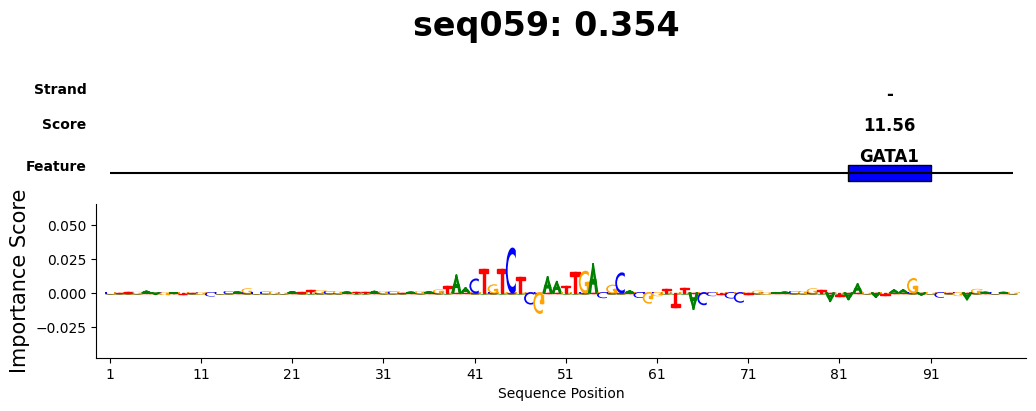

In [22]:
# Plot sequence logo based on feature importance
def test_seq_track_features():
    eu.pl.seq_track_features(sdata, seq_id=sdata.names[59], uns_key="InputXGradient_imps", pred_key="activity_0")
    plt.show()
test_seq_track_features()

Importance values: 0it [00:00, ?it/s]

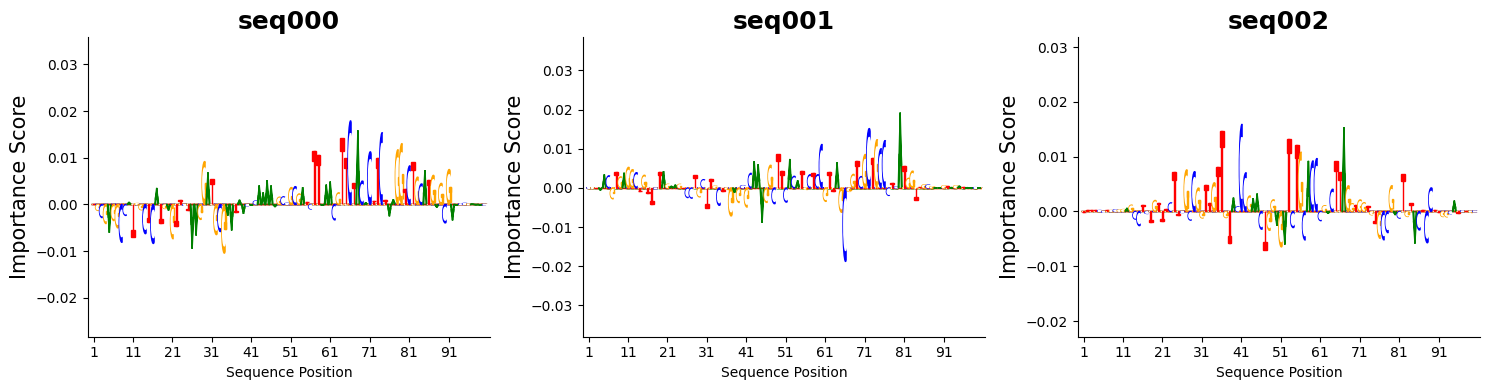

In [24]:
def test_multiseq_track_features():
    eu.pl.multiseq_track_features(sdata, seq_ids=sdata.names[:3], uns_keys="InputXGradient_imps", pred_key="activity_0")
    plt.show()
test_multiseq_track_features()

In [25]:
# Filter visualization
def test_filter_viz_seqlogo():
    eu.pl.filter_viz_seqlogo(sdata, filter_id=0)
    plt.show()
test_filter_viz_seqlogo()

RuntimeError: Unrecoverable error : Ghostscript conversion failed (Invalid postscript?). /usr/local/bin/gs -sDEVICE=png16m -dPDFSETTINGS=/printer -sstdout=%stderr -dColorConversionStrategy=/LeaveColorUnchanged -sOutputFile=- -dDEVICEWIDTHPOINTS=398 -dDEVICEHEIGHTPOINTS=132 -dSAFER -dNOPAUSE -r96 -dGraphicsAlphaBits=4 -dTextAlphaBits=4 -dAlignToPixels=0 -
Return code: 1
b"GPL Ghostscript 9.53.3: Can't find initialization file gs_init.ps.\n"

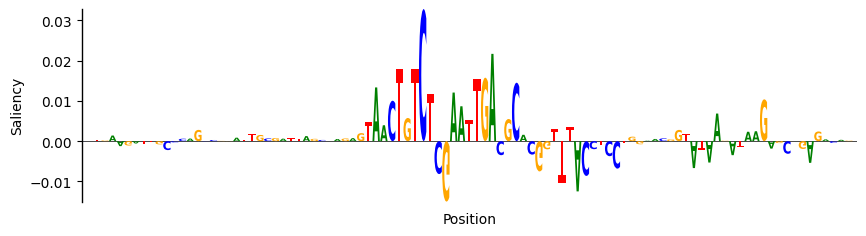

In [26]:
def test_seq_track():
    eu.pl.seq_track(sdata, seq_id=sdata.names[59], uns_key="InputXGradient_imps")
    plt.show()
test_seq_track()

Importance values:   0%|          | 0/1 [00:00<?, ?it/s]

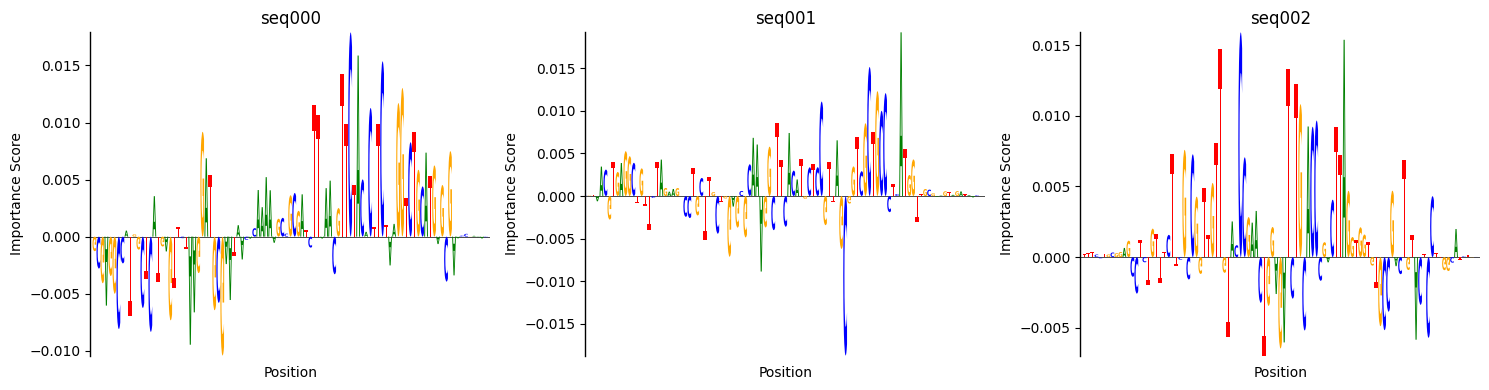

In [32]:
def multiseq_track():
    eu.pl.multiseq_track(sdata, seq_ids=sdata.names[:3], uns_keys="InputXGradient_imps")
    plt.show()
multiseq_track()

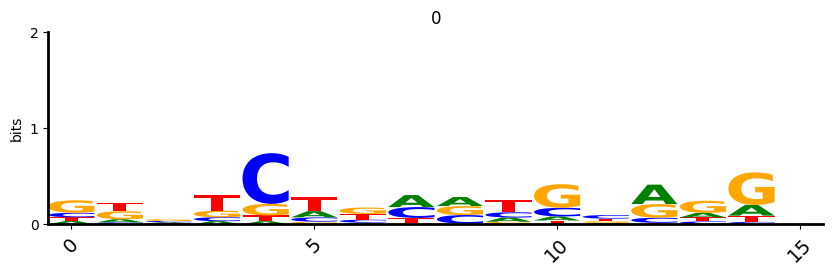

In [35]:
def test_filter_viz():
    eu.pl.filter_viz(sdata, filter_id=0)
    plt.show()
test_filter_viz()

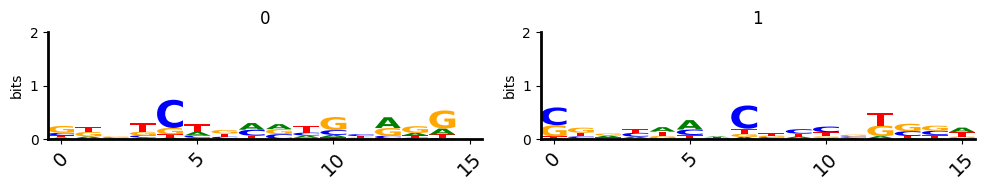

In [38]:
def multifilter_viz():
    eu.pl.multifilter_viz(sdata, filter_ids=[0, 1], num_cols=2, num_rows=1, figsize=(10, 2))
    plt.show()
multifilter_viz()

---

# Dimensionality reduction plotting functions (`_dim_reduce.py`)

In [40]:
eu.interpret.pca(
    sdata,
    uns_key="InputXGradient_imps",
)

Make sure your matrix is sample by feature


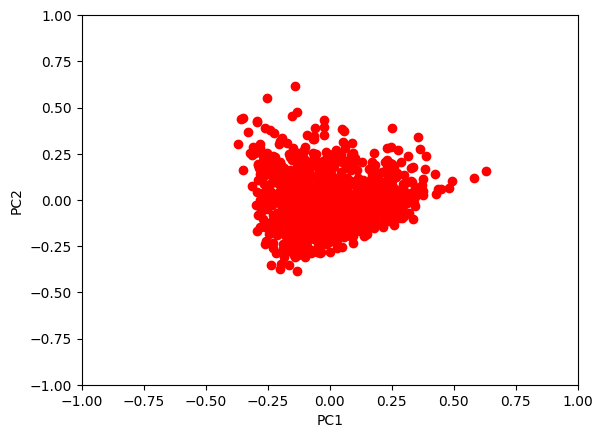

In [41]:
def test_pca():
    eu.pl.pca(sdata, seqsm_key="InputXGradient_imps_pca", color="r")
    plt.show()
test_pca()

---